In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
import taxis
from utils import *
from visualize import *
from sklearn.linear_model import *
from sklearn.kernel_ridge import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
from datetime import datetime
from sklearn.cluster import *
from sklearn.svm import *

DBNAME="../taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952

In [2]:
holidays=['20170626']
def peak(h):
    return 1 if ((h>6 and h <9) or (h > 18)) else 0

def weekday(d):
    dt=datetime.strptime(d,"%Y%m%d")
    return 1 if datetime.isoweekday(dt)<6 else 0

df=taxis.get_df_all_taxi_data(DBNAME,LAT,LON)
df['Hour']=df.apply(lambda r:int(r['Time'][:2]),axis=1)
df['Minute']=df.apply(lambda r:int(r['Time'][2:]),axis=1)
df['PeakHour']=df.apply(lambda r: peak(r['Hour']),axis=1)
df['Weekday']=df.apply(lambda r: weekday(r['Date']),axis=1)
df['Holiday']=df.apply(lambda r: 1 if r['Date'] in holidays else 0,axis=1)
df.head()

,Point,Date,Time,X,Y,TaxiCount,Hour,Minute,PeakHour,Weekday,Holiday
0,0,20170624,0900,24,12,28,9,0,0,0,0
1,1,20170624,0905,24,12,37,9,5,0,0,0
2,2,20170624,0910,24,12,34,9,10,0,0,0
3,3,20170624,0915,24,12,35,9,15,0,0,0
4,4,20170624,0920,24,12,37,9,20,0,0,0


In [3]:
df_sub=df[['Point','Hour','Minute','PeakHour','Weekday','Holiday','TaxiCount']]
df_sub.head()

,Point,Hour,Minute,PeakHour,Weekday,Holiday,TaxiCount
0,0,9,0,0,0,0,28
1,1,9,5,0,0,0,37
2,2,9,10,0,0,0,34
3,3,9,15,0,0,0,35
4,4,9,20,0,0,0,37


In [4]:
df_sub.corr()

,Point,Hour,Minute,PeakHour,Weekday,Holiday,TaxiCount
Point,1.000000,0.021166,0.001360,0.028676,0.114201,-0.335520,-0.113407
Hour,0.021166,1.000000,-0.000369,0.525517,-0.039180,-0.007585,-0.091521
Minute,0.001360,-0.000369,1.000000,0.000264,0.001907,0.001270,0.015425
PeakHour,0.028676,0.525517,0.000264,1.000000,-0.001994,0.000587,0.208867
Weekday,0.114201,-0.039180,0.001907,-0.001994,1.000000,0.186290,0.221770
Holiday,-0.335520,-0.007585,0.001270,0.000587,0.186290,1.000000,0.167646
TaxiCount,-0.113407,-0.091521,0.015425,0.208867,0.221770,0.167646,1.000000


In [9]:
training=df_sub.head(3700)
testing=df_sub.tail(424)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


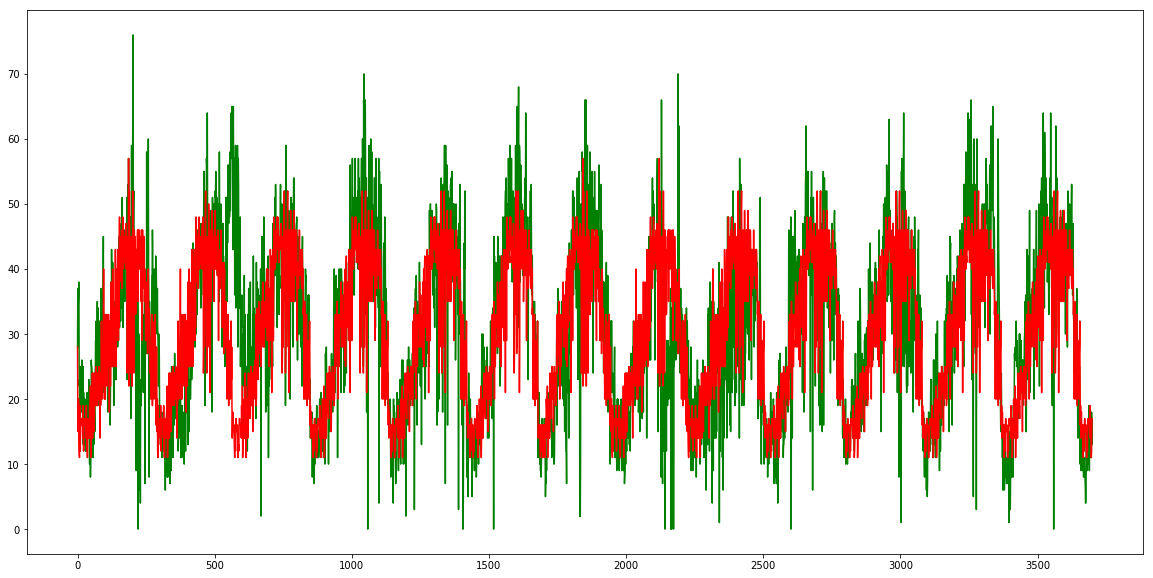

In [10]:
X=training.drop(['Point','TaxiCount'],axis=1).as_matrix()
y=np.array(training['TaxiCount'].tolist()).reshape(-1,1)

svc=SVC().fit(X,y)
print svc

plt.plot(y,color='g')
plt.plot(svc.predict(X),color='r')
plt.show()


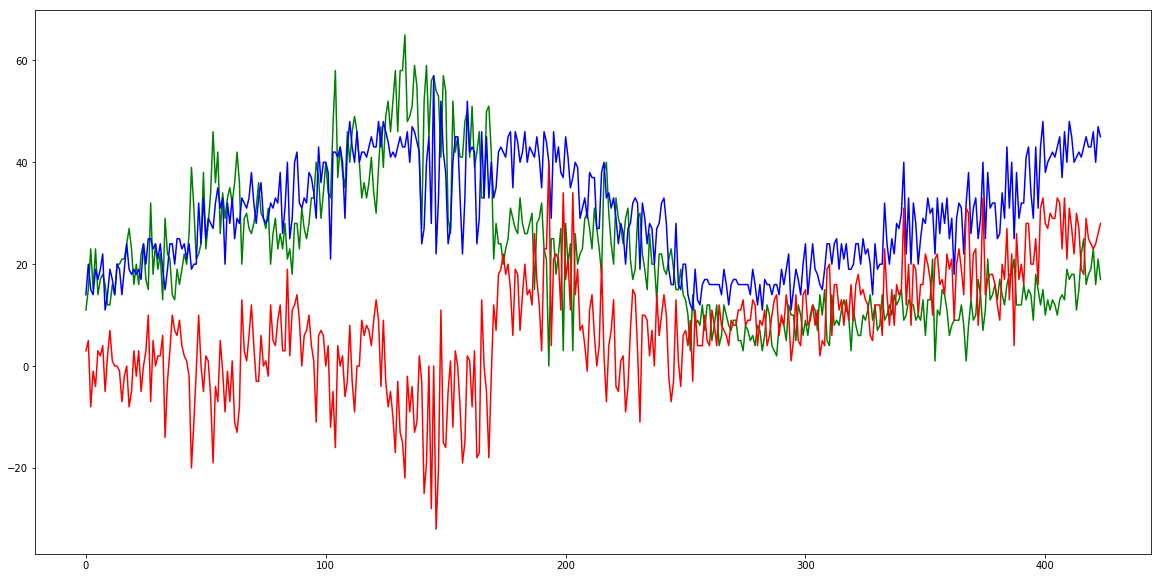

In [15]:
Xt=testing.drop(['Point','TaxiCount'],axis=1).as_matrix()
yt=np.array(testing['TaxiCount'].tolist()).reshape(-1,1)
P=svc.predict(Xt)
e=[x-y for x,y in zip(P,yt)]

plt.plot(yt,color='g')
plt.plot(P,color='b')
plt.plot(e,color='r')
plt.show()